In [1]:
import os
import shutil
import random

# Set the path to your dataset
dataset_dir = 'sportsdataset/balanced'  # Change this to your dataset path
output_dir = '/teamspace/studios/this_studio/newdataset'  # Directory for the new structure

# Create output directories
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'validation'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

# Define your classes (folders) inside the dataset directory
classes = os.listdir(dataset_dir)
print(f"Classes found: {classes}")  # Debugging statement

# Define split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Ensure the ratios sum to 1
assert abs((train_ratio + val_ratio + test_ratio) - 1.0) < 1e-6, "Ratios must sum to 1.0"

# Iterate through each class to split images
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    
    if not os.path.isdir(class_path):
        print(f"Skipping {class_name}, not a directory.")  # Debugging statement
        continue  # Skip if not a directory

    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    print(f"Found {len(images)} images in {class_name}.")  # Debugging statement

    if not images:
        print(f"No images found in {class_name}. Skipping.")  # Debugging statement
        continue  # Skip if no images

    random.shuffle(images)  # Shuffle the images

    # Calculate the split indices
    total_images = len(images)
    train_end = int(total_images * train_ratio)
    val_end = train_end + int(total_images * val_ratio)

    # Split the images
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Create class directories in output
    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'validation', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)

    print(f"Copying {len(train_images)} training images for {class_name}.")
    for image in train_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(output_dir, 'train', class_name, image))
    print(f"Copying {len(val_images)} validation images for {class_name}.")
    for image in val_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(output_dir, 'validation', class_name, image))
    print(f"Copying {len(test_images)} test images for {class_name}.")
    for image in test_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(output_dir, 'test', class_name, image))

print("Dataset has been split into train, validation, and test sets.")


Classes found: ['Badminton', 'Cricket', 'Tennis', 'Rugby', 'Basketball', 'Volleyball']
Found 1921 images in Badminton.
Copying 1344 training images for Badminton.
Copying 384 validation images for Badminton.
Copying 193 test images for Badminton.
Found 1921 images in Cricket.
Copying 1344 training images for Cricket.
Copying 384 validation images for Cricket.
Copying 193 test images for Cricket.
Found 1921 images in Tennis.
Copying 1344 training images for Tennis.
Copying 384 validation images for Tennis.
Copying 193 test images for Tennis.
Found 1921 images in Rugby.
Copying 1344 training images for Rugby.
Copying 384 validation images for Rugby.
Copying 193 test images for Rugby.
Found 1921 images in Basketball.
Copying 1344 training images for Basketball.
Copying 384 validation images for Basketball.
Copying 193 test images for Basketball.
Found 1921 images in Volleyball.
Copying 1344 training images for Volleyball.
Copying 384 validation images for Volleyball.
Copying 193 test imag

Found 10245 images belonging to 6 classes.
Found 2917 images belonging to 6 classes.
Epoch 1/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 87s 257ms/step - accuracy: 0.4455 - loss: 1.5598 - val_accuracy: 0.6712 - val_loss: 0.9057
Epoch 2/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 86s 266ms/step - accuracy: 0.7997 - loss: 0.7771 - val_accuracy: 0.8924 - val_loss: 0.5443
Epoch 3/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 88s 272ms/step - accuracy: 0.8897 - loss: 0.5005 - val_accuracy: 0.9092 - val_loss: 0.4111
Epoch 4/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 88s 274ms/step - accuracy: 0.9118 - loss: 0.3756 - val_accuracy: 0.9277 - val_loss: 0.3144
Epoch 5/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 87s 272ms/step - accuracy: 0.9146 - loss: 0.3291 - val_accuracy: 0.9290 - val_loss: 0.2705
Epoch 6/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 89s 276ms/step - accuracy: 0.9285 - loss: 0.2737 - val_accuracy: 0.9318 - val_loss: 0.2431
Epoch 7/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 86s 266ms/step - accuracy: 0.9392 - loss: 0.2266 - val_accuracy: 0.9407 - val_loss: 0.209

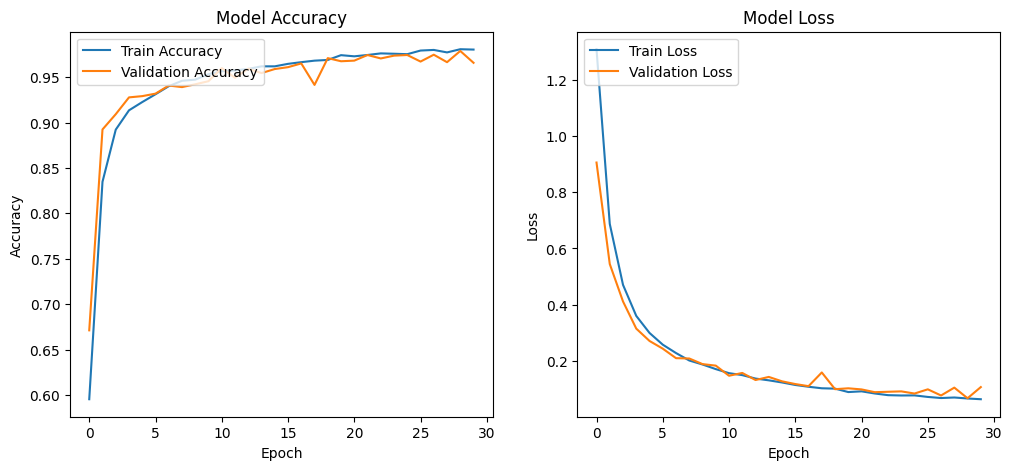

92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step


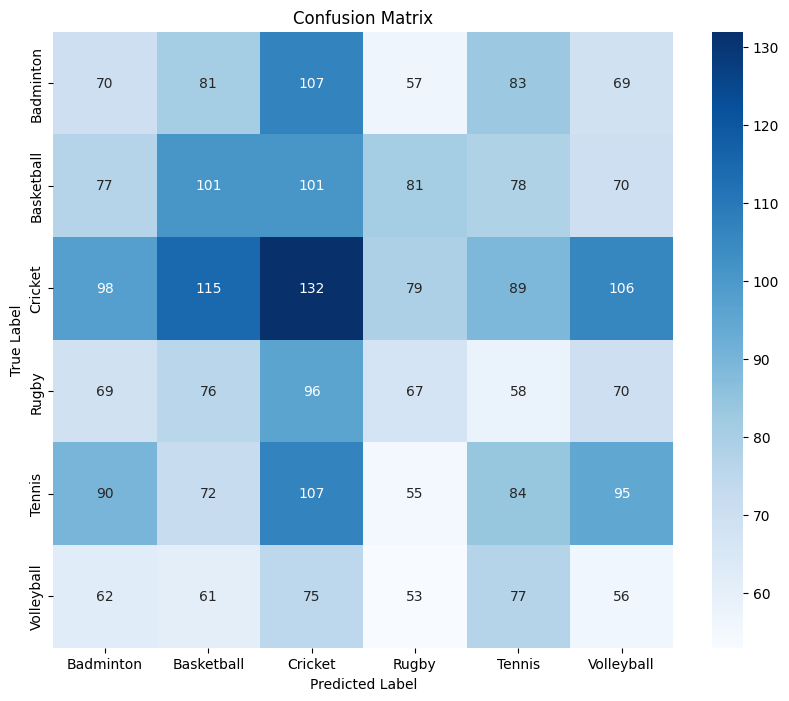

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Set up the data generators
base_dir = 'dataset_split'  # Directory with train, validation, and test folders

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),  # MobileNetV3 input size
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the MobileNetV3 model
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Adjust for number of classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    train_generator,
    epochs=30,  # Adjust as needed
    validation_data=validation_generator
)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 5: Plot accuracy and loss graphs
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.show()

plot_training_history(history)

# Step 6: Plot confusion matrix
def plot_confusion_matrix(model, validation_generator):
    y_true = validation_generator.classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(validation_generator.class_indices.keys()), yticklabels=list(validation_generator.class_indices.keys()))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, validation_generator)

# Save the trained model
model.save('sports_classification_model.h5')


In [22]:
# Save the trained model
model.save('/teamspace/studios/this_studio/finalsports_classification_model.keras')

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Step 1: Load the trained model
model = tf.keras.models.load_model('/teamspace/studios/this_studio/model/finalsports_classification_model.keras')


def prepare_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load the image
    img_array = img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image(image_path):
    prepared_image = prepare_image(image_path)
    predictions = model.predict(prepared_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

def load_class_names():
    class_names = {0: 'Badminton', 1: 'Basketball', 2: 'Cricket', 3: 'Rugby', 4: 'Tennis', 5: 'Volleyball'}  # Update with your class names
    return class_names
    
image_path = '/teamspace/studios/this_studio/volleyball.jpeg'  # Update with your image path
predicted_class = predict_image(image_path)
class_names = load_class_names()
print(f'Predicted Class: {class_names[predicted_class]}')


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
Predicted Class: Volleyball
